In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , precision_score , recall_score , f1_score ,  roc_auc_score

(a) (3 marks) Implement Logistic Regression using Batch Gradient Descent. Plot train-
ing loss vs. iteration, validation loss vs. iteration, training accuracy vs. iteration,
and validation accuracy vs. iteration. Comment on the convergence of the model.
Compare and analyze the plots.

Now , after the preparation of the training dataset , test dataset and val dataset , we will now be going forward and implement the gradient descent from scratch

In [3]:
#getting the data from the csv file.
# -----------------------------------------------------------------------------
data = pd.read_csv(r"Heart Disease.csv")
# -----------------------------------------------------------------------------
# print(data)
# print(y.shape)
# print(x)
# print(x , y[3])
# -----------------------------------------------------------------------------

binary_col = [] # storing the columns that have binary values to replace na values with mode value.
for column in data.columns:
    unique_values = set(data[column].dropna().unique())
    if unique_values == {0,1}:
        binary_col.append(column)
# now that we have got the columns having only binary values , we can change the na values in the binary column corresponding to a row having value with the mode of that column
for column in binary_col :
    if data[column].isnull().sum() > 0:
        mode_val = data[column].mode()[0]
        data[column] = data[column].fillna(mode_val)
# now the columns that dont have binary values , we take the mean of that column and replace the NA values with that. So , we get :
for column in data.columns:
    if column not in binary_col and data[column].isnull().sum() > 0:
        if abs(data[column].skew()) <= 0.5:
            mean_val = data[column].mean()
            data[column] = data[column].fillna(mean_val)
        else:
            median_val = data[column].median()
            data[column] = data[column].fillna(median_val)

# -----------------------------------------------------------------------------
# Taking the x and y labels from the dataset where y is the last column and x are the remaining other columns
x = data.iloc[: , :-1].values # the features x are present before the last column and the last column has the classfication
y = data['HeartDisease'].values # last column having the classification
# so , we have changed the NA values with mean and mode and respectively
# print(data.isna().sum()) -- > checking no NA values present
# print(binary_col)
# print(x)
# -----------------------------------------------------------------------------
# doing no down sampling in this case , so it gives higher accuracy but low recall
xNoDownsampling = x
yNoDownsampling = y
# -----------------------------------------------------------------------------
# Downsampling to increase the recall of the dataset so that number of occurence of 0s and 1s classified values becomes same.
dataBalanced = pd.DataFrame(data = np.column_stack((x,y)) , columns=data.columns)

# taking majortiy and minority classes
majority = dataBalanced[dataBalanced['HeartDisease'] == 0]
minority = dataBalanced[dataBalanced['HeartDisease'] == 1]

# making the majority and minority classes equal
minorityLength = len(minority)

majority = majority.sample(n=minorityLength , random_state=90)

#concatenating downsampled majority class with minority class
dataBalanced = pd.concat([minority , majority])
# shuffling the dataset made after sdownsampling
dataBalanced = dataBalanced.sample(frac = 1 , random_state= 90).reset_index(drop= True)

xBalanced = dataBalanced.iloc[: , :-1].values
yBalanced = dataBalanced['HeartDisease'].values

# -----------------------------------------------------------------------------
# print(xBalanced.shape , yBalanced.shape)
#making the minlmax scaling from scratch
class myMinMaxScaler:
    def __init__(self):
        self.minVal = None
        self.max_ = None

    def fit(self, X):
        self.minVal = np.min(X, axis=0)
        self.maxVal = np.max(X, axis=0)
    def transform(self, X):
        if self.minVal is None or self.maxVal is None:
            raise ValueError("Scaler has not been fitted yet. Call 'fit' first.")

        rangeVal = self.maxVal - self.minVal
        rangeVal[rangeVal == 0] = 1

        X_scaled = (X - self.minVal) / rangeVal
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


# -----------------------------------------------------------------------------

# gestting the train , test and val data by dividing the dataset in the ration 70:15:15
x_train , x_val_and_test , y_train , y_val_and_test = train_test_split(xNoDownsampling, yNoDownsampling , test_size=0.3 , random_state=90) # dividing the data into 70:30 ratio, where 70 is going for training and 30 is going for other components.
x_test , x_val , y_test , y_val = train_test_split(x_val_and_test , y_val_and_test , test_size= 0.5 , random_state=90) # Now , we are dividing the other components into 15:15 that is 50:50 of the remaining data , one for test set and one for val set.
# print(x_train.shape , y_train.shape , x_test.shape , y_test.shape , x_val.shape , y_val.shape)
# -----------------------------------------------------------------------------
# Storing the data values which we got by no scaling
x_train_NoScaling = x_train
x_val_NoScaling = x_val
x_testNoScaling = x_test
# -----------------------------------------------------------------------------
#scaling the data using minmax scaling
scalar = myMinMaxScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_val_scaled = scalar.transform(x_val)
x_test_scaled = scalar.transform(x_test)
# -----------------------------------------------------------------------------
# print(binary_col)

[0.6931471805599435, 0.6905495254166718, 0.6879822835220216, 0.6854450939838437, 0.6829375992091431, 0.6804594449184193, 0.6780102801580092, 0.6755897573104934, 0.6731975321032303, 0.6708332636150791, 0.6684966142813771, 0.6661872498972253, 0.6639048396191484, 0.6616490559651851, 0.6594195748134667, 0.657216075399342, 0.655038240311103, 0.6528857554843682, 0.6507583101951757, 0.6486555970518392, 0.6465773119856196, 0.6445231542402617, 0.6424928263604456, 0.6404860341792011, 0.6385024868043334, 0.6365418966039039, 0.6346039791908135, 0.6326884534065303, 0.6307950413040053, 0.6289234681298179, 0.6270734623055894, 0.6252447554087074, 0.6234370821523958, 0.6216501803651704, 0.6198837909697125, 0.6181376579611993, 0.6164115283851229, 0.6147051523146291, 0.6130182828274123, 0.6113506759821923, 0.6097020907948053, 0.6080722892139383, 0.6064610360965322, 0.6048680991828831, 0.6032932490714664, 0.6017362591935077, 0.600196905787327, 0.5986749678724769, 0.5971702272236984, 0.595682468344716, 0.5

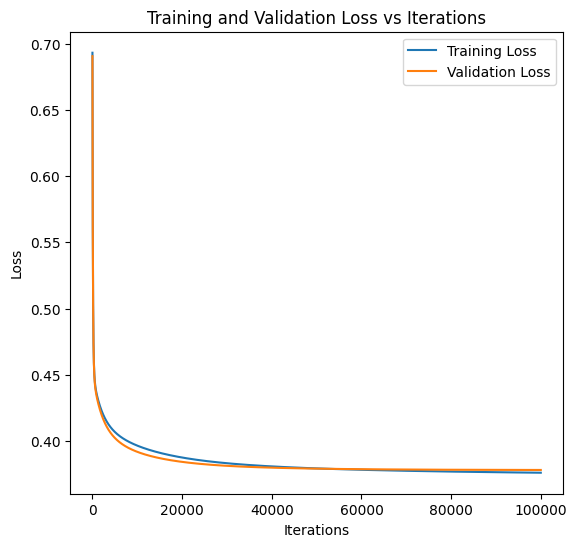

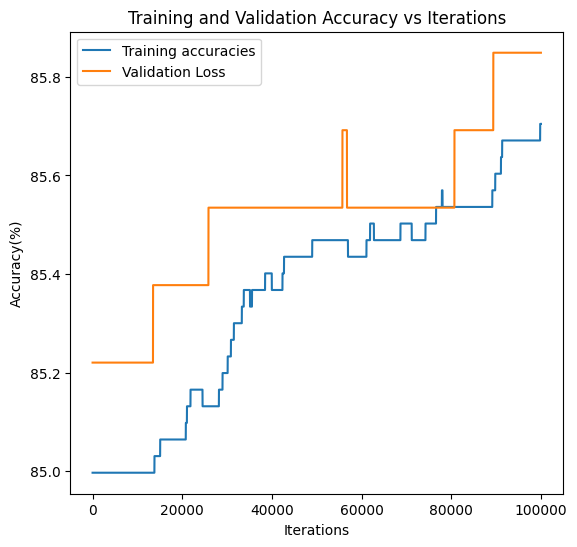

85.84905660377359


In [4]:
# (a) - part

# -----------------------------------------------------------------------------
def sigmoid_function(x) :
    x = np.clip(x , -500 , 500) # clipping to not get error when the value goes close to 0 at denominator
    return 1/(1+np.exp(-x)) # sigmoid function , which we can call while using the BCE .

# -----------------------------------------------------------------------------
# print(sigmoid_function(90))
def loss_function(x , y , w , b):
    # print(x.shape , y.shape)
    n = x.shape[0] # number of data points
    linear_val = np.dot(x , w) + b # xw + b
    pred_val = sigmoid_function(linear_val) # predicted value is sigmoid of wx + b
    # print(pred_val.shape)
    loss = -np.sum(y * np.log(pred_val + 1e-15) + (1 - y) * np.log(1 - pred_val + 1e-15)) / n # using binary cross entropy
    # print((pred_val-y).shape)
    dl_dw = np.dot(x.T, (pred_val - y)) / n  # differentiating the loss wrt w
    # print(dl_dw.shape)
    dl_db = np.sum(pred_val -y)/n # differentiating the loss wrt b

    return loss , dl_dw , dl_db
# -----------------------------------------------------------------------------
def training(x_train , y_train , x_val , y_val ,learningRate , iterations) :
    total_features = x_train.shape[1]
    w = np.zeros(total_features , dtype= np.float64) # initialising W matrix which have the weights -->currently all 0
    b = 0.0 # -> initializing the bias to be 0
    costs = [] ; val_costs = [] ; accuracies = [] ; val_accuracies = []  ; test_accuracies = [] # storing the accuracies and costs for the training and val set
    for i in range(iterations):
        train_cost , dl_dw_train , dl_db_train = loss_function(x_train , y_train , w , b) # calculating the loss and gradient wrt w and b for train .
        # print(len(w), len(dl_dw_train.shape))
        w -= (learningRate * dl_dw_train) ; b-= (learningRate*dl_db_train) # decreasing the weight and bias as per the gradient descent
        # print(dl_dw_train , dl_dw_train)
        # print(w , b)
        val_cost , dl_dw_val , dl_dw_val = loss_function(x_val , y_val , w , b) # calculating the loss and gradient wrt w and b for val .
        train_class_predict = [] # starting prediction with -1 value
        lin_train = np.dot(x_train,w) + b # making the linear function
        sig_train = sigmoid_function(lin_train) # sigmoid of linear function
        for j in range(len(x_train)):
            if sig_train[j] > 0.5 : # if it is more than 0.5 , then it belongs to class 1 , as 0.5 is the decision boundary
                train_class_predict.append(1) # classified as class 1
            else:
                train_class_predict.append(0)# classified as class 0
        # similarly , doing all the steps for val set
        val_class_prediction = []
        lin_val = np.dot(x_val,w) + b # making the linear function
        sig_val = sigmoid_function(lin_val) # sigmoid of linear function
        for j in range(len(x_val)):
            if sig_val[j] > 0.5 : # if it is more than 0.5 , then it belongs to class 1 , as 0.5 is the decision boundary
                val_class_prediction.append(1)# classified as class 1
            else:
                val_class_prediction.append(0)# classified as class 0
        lin_test = np.dot(x_test_scaled , w) + b
        sig_test = sigmoid_function(lin_test)
        accuracy_train = np.mean((sig_train > 0.5) == y_train)*100 # calculating the accuracy for train
        accuracy_val = np.mean((sig_val > 0.5) == y_val)*100 # calculating the accuracy for test
        accuracy_test = np.mean((sig_test > 0.5) == y_test)*100
        costs.append(train_cost) ; val_costs.append(val_cost) ; accuracies.append(accuracy_train) ; val_accuracies.append(accuracy_val) ; test_accuracies.append(accuracy_test)# appending costs , val_cost , train_accuracy and val_accuracy

    return w , b , costs , val_costs , accuracies , val_accuracies , max(val_accuracies)
# -----------------------------------------------------------------------------

w , b , costs , val_costs , accuracies , val_accuracies , Val_accuracy_val= training(x_train_scaled , y_train , x_val_scaled , y_val  ,  0.01 ,100000)  # using learning rate as 0.01 and no of iterations as 10000.
# print(f'{accuracies}\n{val_accuracies}')
print(costs)
# -----------------------------------------------------------------------------
# print(max(val_accuracies))
mat.figure(figsize=(14 , 6))
mat.subplot(1,2,1)
mat.plot(costs , label = 'Training Loss')
mat.plot(val_costs , label = 'Validation Loss')
mat.xlabel('Iterations')
mat.ylabel('Loss')
mat.title("Training and Validation Loss vs Iterations")
mat.legend()
# -----------------------------------------------------------------------------
mat.figure(figsize=(14 , 6))
mat.subplot(1,2,1)
mat.plot(accuracies , label = 'Training accuracies')
mat.plot(val_accuracies , label = 'Validation Loss')
mat.xlabel('Iterations')
mat.ylabel('Accuracy(%)')
mat.title("Training and Validation Accuracy vs Iterations")
mat.legend()
mat.show()
print(Val_accuracy_val)
# -----------------------------------------------------------------------------


(b) (2 marks) Investigate and compare the performance of the model with different
feature scaling methods: Min-max scaling and No scaling. Plot the loss vs. iteration
for each method and discuss the impact of feature scaling on model convergence.


85.37735849056604


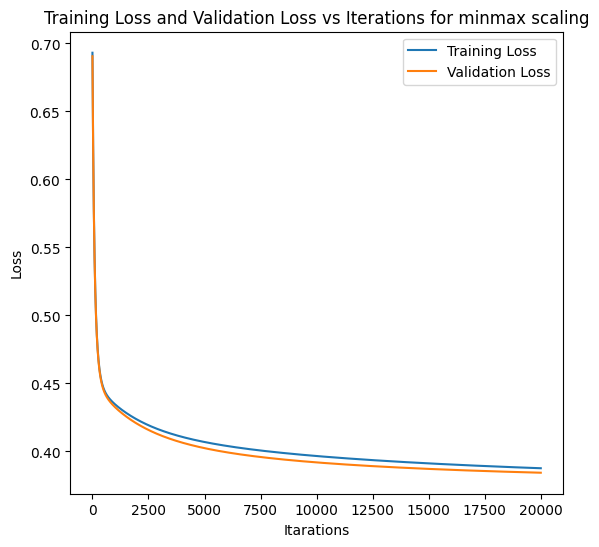

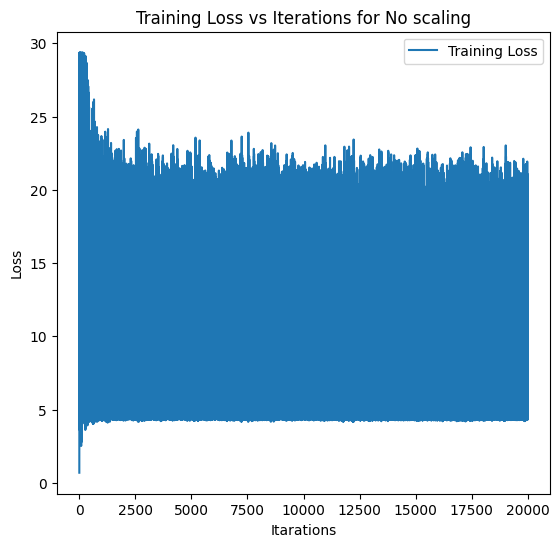

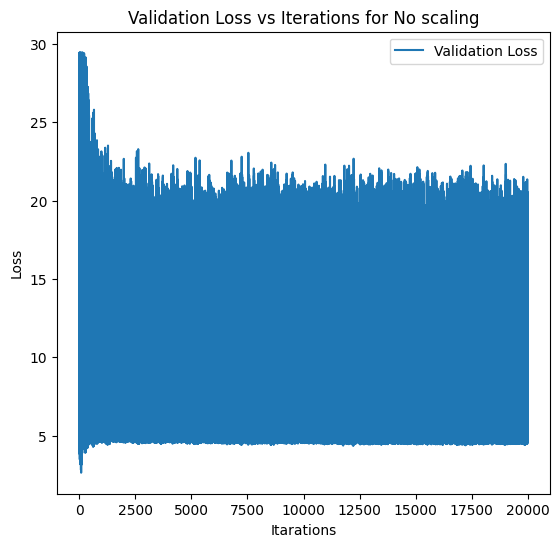

In [6]:
# -----------------------------------------------------------------------------
# similarly , taking the cost for min max Scaling
w1 , b1 , costs1 , val_costs1 , accuracies1 , val_accuracies1 , max_test_accuracy1= training(x_train_scaled  , y_train , x_val_scaled , y_val , 0.01 , 20000)
# -----------------------------------------------------------------------------
# print(max(val_accuracies))
print(max_test_accuracy1)
# making first for training loss
mat.figure(figsize=(14 , 6))
mat.subplot(1,2,1)
mat.plot(costs1 , label = 'Training Loss')
mat.plot(val_costs1 , label = 'Validation Loss')
mat.xlabel('Itarations')
mat.ylabel('Loss')
mat.title("Training Loss and Validation Loss vs Iterations for minmax scaling")
mat.legend()
# -----------------------------------------------------------------------------
# similarly , taking the cost for No scaling
w2 , b2 , costs2, val_costs2 , accuracies2 , val_accuracies2 , max_test_accuracy2= training(x_train_NoScaling  , y_train , x_val_NoScaling , y_val , 0.01 , 20000)
# -----------------------------------------------------------------------------
# print(max(val_accuracies))
# making first for training loss so that it doesn't overlap
mat.figure(figsize=(14 , 6))
mat.subplot(1,2,1)
mat.plot(costs2 , label = 'Training Loss')
mat.xlabel('Itarations')
mat.ylabel('Loss')
mat.title("Training Loss vs Iterations for No scaling")
mat.legend()
# now , for val loss.
mat.figure(figsize=(14 , 6))
mat.subplot(1,2,1)
mat.plot(val_costs2 , label = 'Validation Loss')
mat.xlabel('Itarations')
mat.ylabel('Loss')
mat.title("Validation Loss vs Iterations for No scaling")
mat.legend()
# -----------------------------------------------------------------------------

(c) (2 marks) Calculate and present the confusion matrix for the validation set. Re-
port precision, recall, F1 score, and ROC-AUC score for the model based on the
validation set. Comment on how these metrics provide insight into the model’s
performance.

In [7]:
# -----------------------------------------------------------------------------
# now , we will be doing the performance evaluation on the validation set for min-max scaling
y_valPrediction = sigmoid_function(np.dot(x_val_scaled , w1) + b1) >= 0.5
confusion_mat = confusion_matrix(y_val , y_valPrediction)
precisionValue = precision_score(y_val , y_valPrediction)
recallValue = recall_score(y_val , y_valPrediction)
f1Value = f1_score(y_val , y_valPrediction)
ROCValue = roc_auc_score(y_val , y_valPrediction)
# printing the values for performance evaluations based on confusion matrix , precision value , recall value , F1 score and ROC-AUC score.
print(f'Confusion Matrix for min-max scaling:\n{confusion_mat}\nPrecision:{precisionValue}\nRecall:{recallValue}\nF1-Score:{f1Value}\nROC-AUC Score:{ROCValue}\n')
# -----------------------------------------------------------------------------
# now , we will be doing the performance evaluation on the validation set for No scaling
y_valPrediction = sigmoid_function(np.dot(x_val_NoScaling , w2) + b2) >= 0.5
confusion_mat = confusion_matrix(y_val , y_valPrediction)
precisionValue = precision_score(y_val , y_valPrediction)
recallValue = recall_score(y_val , y_valPrediction)
f1Value = f1_score(y_val , y_valPrediction)
ROCValue = roc_auc_score(y_val , y_valPrediction)
# printing the values for performance evaluations based on confusion matrix , precision value , recall value , F1 score and ROC-AUC score.
print(f'Confusion Matrix for no scaling:\n{confusion_mat}\nPrecision:{precisionValue}\nRecall:{recallValue}\nF1-Score:{f1Value}\nROC-AUC Score:{ROCValue}')
# -----------------------------------------------------------------------------

Confusion Matrix for min-max scaling:
[[542   0]
 [ 93   1]]
Precision:1.0
Recall:0.010638297872340425
F1-Score:0.021052631578947368
ROC-AUC Score:0.5053191489361702

Confusion Matrix for no scaling:
[[542   0]
 [ 94   0]]
Precision:0.0
Recall:0.0
F1-Score:0.0
ROC-AUC Score:0.5


c:\Users\sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(d) (3 marks) Implement and compare the following optimisation algorithms: Stochas-
tic Gradient Descent and Mini-Batch Gradient Descent (with varying batch sizes,
at least 2). Plot and compare the loss vs. iteration and accuracy vs. iteration for
each method. Discuss the trade-offs in terms of convergence speed and stability
between these methods.

68.39378238341969


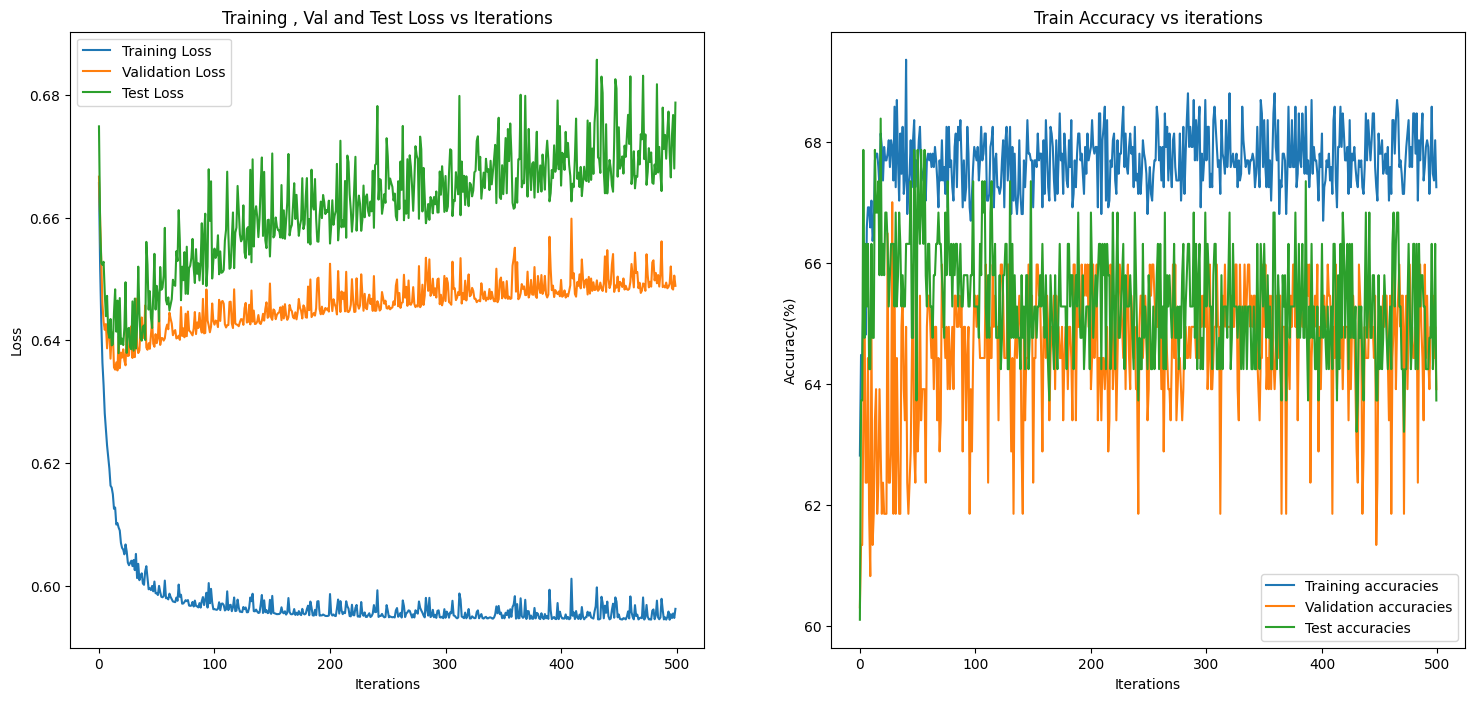

In [71]:
# print(x_test_scaled)
#implementing stochiastic gradient descent and mini-batch gradient descent (using batch size as 96 and 124)
import numpy as np

def stochiastic_GD(x_train , y_train ,x_val , y_val , x_test , y_test , learning_rate , iterations):
    total_features = x_train.shape[1]
    w = np.zeros(total_features , dtype=np.float64) # initialising W matrix which have the weights -->currently all 0
    b = 0.0 # -> initializing the bias to be 0
    costs = [] ; val_costs = [] ; test_costs = [] ; accuracies = [] ; val_accuracies = [] ; test_accuracies = []
    for i in range(iterations):
        permutation = np.random.permutation(len(x_train)) # shuffling the data
        xTrainShuffled = x_train[permutation] # shuffling the x_train
        yTrainShuffled = y_train[permutation] # shuffling the y_train
        for j in range(len(x_train)):
            dl_dw_train = (xTrainShuffled[j] * (sigmoid_function(np.dot(xTrainShuffled[j] , w) + b) - yTrainShuffled[j])) # taking the derivative wrt w in for each data point in for loop
            dl_db_train = (sigmoid_function(np.dot(xTrainShuffled[j] , w) + b) - yTrainShuffled[j]) # taking the derivative wrt b for each data point in for loop
            w -= (learning_rate) * dl_dw_train ; b -= (learning_rate)*dl_db_train # changing weight and bias as per gradient descent

        train_cost , dl_dwNouseTrain , dl_dbNouseTrain = loss_function(x_train , y_train , w , b)
        val_cost , dldwNouseVal , dldbNouseVal =  loss_function(x_val , y_val , w , b)
        test_cost , dldwNouuseTest , dldbNouseTest = loss_function(x_test , y_test , w, b)
        # print(test_cost)
        # trainClassPredict = []
        linTrain = np.dot(x_train , w) + b
        sigTrain = sigmoid_function(linTrain)
        # for i in range(len(x_train)):
        #     if sigTrain[i] >= 0.5 :
        #         trainClassPredict.append(1)
        #     else:
        #         trainClassPredict.append(0)
        # valClassPredict = []
        linVal = np.dot(x_val , w) + b
        sigVal = sigmoid_function(linVal)
        # for i in range(len(x_val)):
        #     if sigVal[i] >= 0.5 :
        #         valClassPredict.append(1)
        #     else:
        #         valClassPredict.append(0)
        # testClassPredict = []
        linTest = np.dot(x_test , w) + b
        sigTest = sigmoid_function(linTest)
        # for i in range(len(x_test)):
        #     if sigTest[i] >= 0.5 :
        #         testClassPredict.append(1)
        #     else:
        #         testClassPredict.append(0)
        accuracyTrain = np.mean((sigTrain >= 0.5) == y_train) * 100
        accuracyVal = np.mean((sigVal >= 0.5) == y_val) * 100
        accuracyTest = np.mean((sigTest >= 0.5) == y_test) * 100
        costs.append(train_cost) ; val_costs.append(val_cost) ; test_costs.append(test_cost) ; accuracies.append(accuracyTrain) ; val_accuracies.append(accuracyVal)  ; test_accuracies.append(accuracyTest)
    return w , b , costs , val_costs ,test_costs ,accuracies , val_accuracies , test_accuracies


w , b , costs , val_costs ,  test_costs, accuracies , val_accuracies , test_accuracies = stochiastic_GD(x_train_scaled , y_train , x_val_scaled , y_val , x_test_scaled , y_test , 0.01 , 500) # using learning rate as 0.01 and no of iterations as 500
print(max(test_accuracies))
mat.figure(figsize=(18 , 8))
mat.subplot(1,2,1)
mat.plot(costs , label = 'Training Loss')
mat.plot(val_costs , label = 'Validation Loss')
mat.plot(test_costs , label = 'Test Loss')
mat.xlabel('Iterations')
mat.ylabel('Loss')
mat.title("Training , Val and Test Loss vs Iterations")
mat.legend()


mat.subplot(1,2,2)
mat.plot(accuracies , label = 'Training accuracies')
mat.plot(val_accuracies , label = 'Validation accuracies')
mat.plot(test_accuracies , label = 'Test accuracies')
mat.xlabel('Iterations')
mat.ylabel('Accuracy(%)')
mat.title('Train Accuracy vs iterations')
mat.legend()
mat.show()


Now , implementing mini-batch gradient descent (with batch sizes 96 , 124 and 152)

67.87564766839378


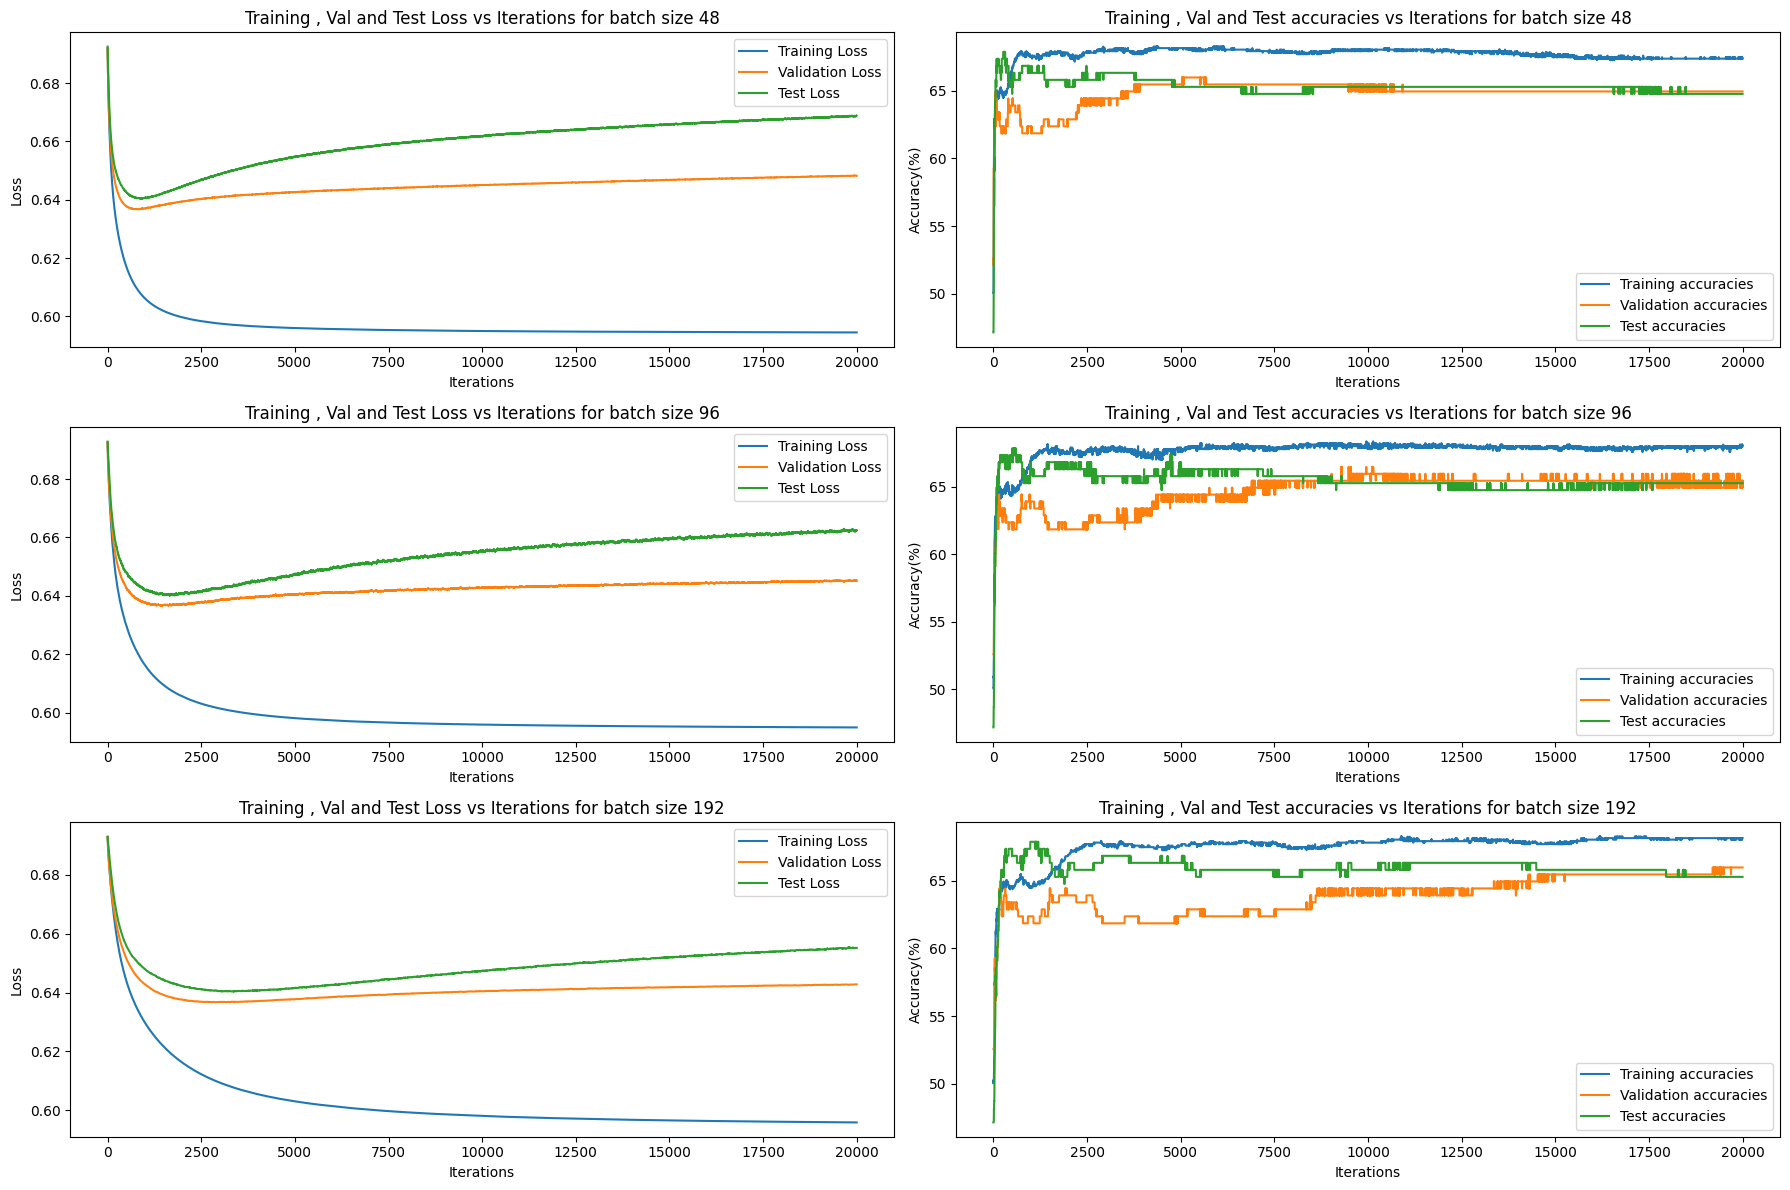

In [72]:
def mini_batch_GD(x_train , y_train ,x_val , y_val , x_test , y_test , learning_rate , iterations , batch_size):
    total_features = x_train.shape[1]
    w = np.zeros(total_features , dtype=np.float64) # initialising W matrix which have the weights -->currently all 0
    b = 0.0 # -> initializing the bias to be 0
    costs = [] ; val_costs = [] ; test_costs = [] ; accuracies = [] ; val_accuracies = [] ; test_accuracies = [] # storing the accuracies and costs for the training and val set
    for i in range(iterations):
        randLength = np.random.permutation(len(x_train)) # shuffling the data
        x_trainShuffled = x_train[randLength] # shuffling the x_train
        y_trainShuffled = y_train[randLength]   # shuffling the y_train 
        for j in range(0 , len(x_train) , batch_size) : # iterating over the data in batches
            xBatch = x_trainShuffled[j: j + batch_size] # taking the batch of data
            yBatch = y_trainShuffled[j : j + batch_size] # taking the batch of data
            trainCost , dldwTrain , dldbTrain = loss_function(xBatch , yBatch , w , b) # calculating the loss and gradient wrt w and b for train .
            w -= (learning_rate * dldwTrain) 
            b -= (learning_rate * dldbTrain)
        trainCost , dldwTrainnouse , dldbTrainnouse = loss_function(x_train , y_train , w , b) # calculating the loss and gradient wrt w and b for train .
        valCost , dldwValnouse , dldbValnouse = loss_function(x_val , y_val , w , b) # calculating the loss and gradient wrt w and b for val .
        testCost , dldwTrainnouse , dldbValnouse = loss_function(x_test , y_test , w , b)   # calculating the loss and gradient wrt w and b for test . 
        costs.append(trainCost) ; val_costs.append(valCost) ; test_costs.append(testCost)
        trainClassPredict = []
        linTrain = np.dot(x_train , w) + b
        sigTrain = sigmoid_function(linTrain)
        for j in range(len(x_train)):
            if sigTrain[j] >= 0.5 :
                trainClassPredict.append(1)
            else:
                trainClassPredict.append(0)
        valClassPredict = []
        linVal = np.dot(x_val , w) + b
        sigVal = sigmoid_function(linVal)
        for j in range(len(x_val)):
            if sigVal[j] >= 0.5 :
                valClassPredict.append(1)
            else:
                valClassPredict.append(0)
        testClassPredict = []
        linTest = np.dot(x_test , w) + b
        sigTest = sigmoid_function(linTest)
        for j in range(len(x_test)):
            if sigTest[j] >= 0.5 :
                testClassPredict.append(1)
            else:
                testClassPredict.append(0)

        accuracyTrain = np.mean((sigTrain >= 0.5) == y_train) * 100 # calculating the accuracy for train
        accuracyVal = np.mean((sigVal >= 0.5) == y_val)*100     # calculating the accuracy for val 
        accuracyTest = np.mean((sigTest >= 0.5) == y_test)*100  # calculating the accuracy for test 
        accuracies.append(accuracyTrain) ; val_accuracies.append(accuracyVal) ; test_accuracies.append(accuracyTest) # appending the accuracies for train , val and test

    return w , b , costs , val_costs , test_costs , accuracies , val_accuracies , test_accuracies


w1, b1 , costs1 , val_costs1, test_costs1 , accuracies1 , val_accuracies1 , test_accuracies1 = mini_batch_GD(x_train_scaled , y_train , x_val_scaled , y_val , x_test_scaled , y_test , 0.01 , 20000, 48)  # using learning rate as 0.01 and no of iterations as 20000 and batch size as 48
w2 , b2 , costs2 ,val_costs2 , test_costs2 , accuracies2 , val_accuracies2 , test_accuracies2 = mini_batch_GD(x_train_scaled , y_train , x_val_scaled , y_val , x_test_scaled , y_test , 0.01 , 20000, 96) # using learning rate as 0.01 and no of iterations as 20000 and batch size as 96
w3 , b3 , costs3 ,val_costs3 , test_costs3 , accuracies3 , val_accuracies3 , test_accuracies3 = mini_batch_GD(x_train_scaled , y_train , x_val_scaled , y_val , x_test_scaled , y_test , 0.01 , 20000, 192) # using learning rate as 0.01 and no of iterations as 20000 and batch size as 192
# print(max(val_accuracies1)) 
# print(max(val_accuracies2))
# print(max(val_accuracies3))
print(max([max(test_accuracies1) , max(test_accuracies2 ) , max(test_accuracies3)]))
mat.figure(figsize=(18 , 12))
mat.subplot(3 , 2 ,1)
mat.plot(costs1 , label = 'Training Loss')
mat.plot(val_costs1 , label = 'Validation Loss')
mat.plot(test_costs1 , label = 'Test Loss')
mat.xlabel('Iterations')
mat.ylabel('Loss')
mat.title("Training , Val and Test Loss vs Iterations for batch size 48")
mat.legend()


mat.subplot(3 , 2 ,2)
mat.plot(accuracies1 , label = 'Training accuracies')
mat.plot(val_accuracies1 , label = 'Validation accuracies')
mat.plot(test_accuracies1 , label = 'Test accuracies')
mat.xlabel('Iterations')
mat.ylabel('Accuracy(%)')
mat.title("Training , Val and Test accuracies vs Iterations for batch size 48")
mat.legend()


mat.subplot(3 , 2 ,3)
mat.plot(costs2 , label = 'Training Loss')
mat.plot(val_costs2 , label = 'Validation Loss')
mat.plot(test_costs2 , label = 'Test Loss')
mat.xlabel('Iterations')
mat.ylabel('Loss')
mat.title("Training , Val and Test Loss vs Iterations for batch size 96")
mat.legend()

mat.subplot(3 , 2 , 4)
mat.plot(accuracies2 , label = 'Training accuracies')
mat.plot(val_accuracies2 , label = 'Validation accuracies')
mat.plot(test_accuracies2 , label = 'Test accuracies')
mat.xlabel('Iterations')
mat.ylabel('Accuracy(%)')
mat.title("Training , Val and Test accuracies vs Iterations for batch size 96")
mat.legend()


mat.subplot(3,2,5)
mat.plot(costs3 , label = 'Training Loss')
mat.plot(val_costs3 , label = 'Validation Loss')
mat.plot(test_costs3 , label = 'Test Loss')
mat.xlabel('Iterations')
mat.ylabel('Loss')
mat.title("Training , Val and Test Loss vs Iterations for batch size 192")
mat.legend()

mat.subplot(3,2,6)
mat.plot(accuracies3 , label = 'Training accuracies')
mat.plot(val_accuracies3 , label = 'Validation accuracies')
mat.plot(test_accuracies3 , label = 'Test accuracies')
mat.xlabel('Iterations')
mat.ylabel('Accuracy(%)')
mat.title("Training , Val and Test accuracies vs Iterations for batch size 192")

mat.legend()
mat.tight_layout()
mat.show()



(e) (2 marks) Implement k-fold cross-validation (with k=5) to assess the robustness
of your model. Report the average and standard deviation for accuracy, precision,
recall, and F1 score across the folds. Discuss the stability and variance of the
model’s performance across different folds.

In [73]:
def k_fold_validation(x, y, k, learning_rate, iterations): # k-fold validation
    indices = np.arange(x.shape[0]) # getting the indices of the data
    np.random.shuffle(indices) # shuffling the indices
    x = x[indices] ; y = y[indices] # shuffling the data
    foldSize = len(x) // k # getting the size of each fold
    accuraciesList = []  ; precisions = []  ; recalls = []  ; f1s = [] # storing the accuracies , precisions , recalls and f1 scores
    for i in range(k): # iterating over the folds
        val_start_idx = i * foldSize # getting the start index of the validation set
        val_end_idx = (i + 1) * foldSize # getting the end index of the validation set
          
        xTest = x[val_start_idx:val_end_idx] # getting the x values for the validation set
        yTest = y[val_start_idx:val_end_idx] # getting the y values for the validation set
         
        xTrain = np.concatenate((x[:val_start_idx], x[val_end_idx:]), axis=0) # getting the x values for the training set
        yTrain = np.concatenate((y[:val_start_idx], y[val_end_idx:]), axis=0) # getting the y values for the training set
        scaler = myMinMaxScaler() # using the minmax scaling
        xTrain = scaler.fit_transform(xTrain) # fitting and transforming the training data
        xTest = scaler.transform(xTest)     # transforming the test data
        w, b, costs, val_costs, accuracies, val_accuracies , maxTestAccuracy= training(xTrain, yTrain, xTest, yTest, learning_rate, iterations)     # training the model
        yPredicted = sigmoid_function(np.dot(xTest, w) + b) >= 0.5 # predicting the values
        accuracy = np.mean(yPredicted == yTest) * 100 # calculating the accuracy
        precision = precision_score(yTest, yPredicted, zero_division=1) # calculating the precision
        recall = recall_score(yTest, yPredicted, zero_division=1)   # calculating the recall
        f1 = f1_score(yTest, yPredicted, zero_division=1)               # calculating the f1 score
        accuraciesList.append(accuracy) ;  precisions.append(precision) ; recalls.append(recall) ; f1s.append(f1)       # appending the values
        print(accuracy , precision , recall , f1) 
    
    avgAccuracy = np.mean(accuraciesList) ; stdAccuracy = np.std(accuraciesList) 
    avgPrecision = np.mean(precisions) ;stdPrecision = np.std(precisions)
    avgRecall = np.mean(recalls) ;stdRecall = np.std(recalls)
    avgF1 = np.mean(f1s) ; stdF1 = np.std(f1s)
    return avgAccuracy, stdAccuracy, avgPrecision, stdPrecision, avgRecall, stdRecall, avgF1, stdF1


avgAccuracy , stdAccuracy , avgPrecision , stdPrecision , avgRecall , stdRecall , avgF1 , stdF1 = k_fold_validation(xBalanced, yBalanced , 5 , 0.01 , 1000)
print(f'Average accuracy is: {avgAccuracy} , standard deviation for accuracy is: {stdAccuracy}')
print(f'Average precision is: {avgPrecision} , standard deviation for precision is: {stdPrecision}')
print(f'Average recall is: {avgRecall} , standard deviation for recall is: {stdRecall}')
print(f'Average f1 is: {avgF1} , standard deviation for f1 is: {stdF1}')





68.48249027237354 0.6533333333333333 0.7716535433070866 0.7075812274368231
61.478599221789885 0.6012658227848101 0.7251908396946565 0.657439446366782
65.36964980544747 0.6338028169014085 0.7086614173228346 0.6691449814126395
58.754863813229576 0.6046511627906976 0.5864661654135338 0.5954198473282443
63.81322957198443 0.6 0.768 0.6736842105263158
Average accuracy is: 63.579766536964975 , standard deviation for accuracy is: 3.316307510142023
Average precision is: 0.61861062716205 , standard deviation for precision is: 0.02134728685673454
Average recall is: 0.7119943931476224 , standard deviation for recall is: 0.06728808673759588
Average f1 is: 0.6606539426141609 , standard deviation for f1 is: 0.03663297928496541


(f) (3 marks) Implement early stopping in your best Gradient Descent method to avoid
overfitting. Define and use appropriate stopping criteria. Experiment with different
learning rates and regularization techniques (L1 and L2). Plot and compare the
performance with and without early stopping. Analyze the effect of early stopping
on overfitting and generalization.

In [74]:
def l2regularization(w , constant) :    
    return constant * np.sum(w**2) # calculating the l2 regularization


def l1regularization(w , constant):
    return constant * np.sum(np.abs(w)) # calculating the l1 regularization

def lossl2(x , y , w , b  , constant) : 
    loss , dl_dw , dl_db = loss_function(x , y , w , b) # calculating the loss and gradient wrt w and b
    regLoss = l2regularization(w , constant) # calculating the l2 regularization
    dl_dw += 2 * constant * w # adding the l2 regularization to the gradient
    return loss + regLoss , dl_dw , dl_db # returning the loss , gradient wrt w and gradient wrt b

def lossl1(x , y , w , b , constant):
    loss , dl_dw , dl_db = loss_function(x , y , w , b)  # calculating the loss and gradient wrt w and b
    regLoss = l1regularization(w , constant) # calculating the l1 regularization 
    dl_dw += constant * np.sign(w) # adding the l1 regularization to the gradient
    return loss + regLoss , dl_dw , dl_db # returning the loss , gradient wrt w and gradient wrt b
def early_stoppingBatchGDL1(x_train , y_train , x_val , y_val , learning_rate , iteration , patience, constant):
    # implementing early stopping on batch gradient descent which gave the best max test accurcay
    nFeatures = x_train.shape[1] # getting the number of features
    w = np.zeros(nFeatures , dtype=np.float64) # initialising W matrix which have the weights -->currently all 0
    b = 0.0
    costs = [] ; val_costs = [] ; accuracies = [] ; val_accuracies = [] ; test_accuracies = [] 
    minValLoss = float('inf') # setting the minimum validation loss to infinity
    count = 0
    for i in range(iteration) :
        trainCost , dl_dw_train , dl_db_train = lossl1(x_train  , y_train , w , b , constant)   # calculating the loss and gradient wrt w and b for train .
        w -= (learning_rate*dl_dw_train) ; b -= (learning_rate * dl_db_train) # decreasing the weight and bias as per the gradient descent
        valCost , dl_dw_val , dl_db_val = lossl1(x_val , y_val , w , b , constant) # calculating the loss and gradient wrt w and b for val .
        costs.append(trainCost) ; val_costs.append(valCost) # appending the costs and val_costs 
        accuracyTrain = np.mean((sigmoid_function(np.dot(x_train , w) + b) >0.5) == y_train)    # calculating the accuracy for train
        accuracyVal = np.mean((sigmoid_function(np.dot(x_val , w) + b) > 0.5) == y_val) # calculating the accuracy for val
        accuracyTest = np.mean((sigmoid_function(np.dot(x_test_scaled , w) + b) > 0.5) == y_test) 
        accuracies.append(accuracyTrain) ; val_accuracies.append(accuracyVal) ; test_accuracies.append(accuracyTest) # appending the accuracies for train and val
        if valCost < minValLoss: # checking if the validation loss is less than the minimum validation loss
            minValLoss = valCost
            count = 0
        else: # if not , then increasing the count
            count += 1
            if count == patience:
                print(f'Early stopping at iteration {i}')
                break
    
    return w , b , costs , val_costs , accuracies , val_accuracies , max(test_accuracies) 
def early_stoppingBatchGDL2(x_train , y_train , x_val , y_val , learning_rate , iteration , patience ,constant): 
    # implementing early stopping on batch gradient descent which gave the best max test accurcay
    nFeatures = x_train.shape[1] # getting the number of features
    w = np.zeros(nFeatures , dtype=np.float64) # initialising W matrix which have the weights -->currently all 0
    b = 0.0
    costs = [] ; val_costs = [] ; accuracies = [] ; val_accuracies = [] ; test_accuracies = [] # storing the accuracies and costs for the training and val set
    minValLoss = float('inf') # setting the minimum validation loss to infinity
    count = 0
    for i in range(iteration) :
        trainCost , dl_dw_train , dl_db_train = lossl2(x_train  , y_train , w , b , constant) # calculating the loss and gradient wrt w and b for train .
        w -= (learning_rate*dl_dw_train) ; b -= (learning_rate * dl_db_train) # decreasing the weight and bias as per the gradient descent
        valCost , dl_dw_val , dl_db_val = lossl2(x_val , y_val , w , b , constant) # calculating the loss and gradient wrt w and b for val .
        costs.append(trainCost) ; val_costs.append(valCost) 
        accuracyTrain = np.mean((sigmoid_function(np.dot(x_train , w) + b) >0.5) == y_train)    # calculating the accuracy for train
        accuracyVal = np.mean((sigmoid_function(np.dot(x_val , w) + b) > 0.5) == y_val)         # calculating the accuracy for val  
        accuracyTest = np.mean((sigmoid_function(np.dot(x_test_scaled , w) + b) > 0.5) == y_test)           # calculating the accuracy for test
        accuracies.append(accuracyTrain) ; val_accuracies.append(accuracyVal) ; test_accuracies.append(accuracyTest)        # appending the accuracies for train and val
        if valCost < minValLoss: # checking if the validation loss is less than the minimum validation loss
            minValLoss = valCost
            count = 0
        else: # if not , then increasing the count
            count += 1
            if count == patience:
                print(f'Early stopping at iteration {i}')
                break
    
    return w , b , costs , val_costs , accuracies , val_accuracies , max(test_accuracies)

w1 , b1 , costs1 , val_costs1 , accuracies1 , val_accuracies1 , maxTestAccuracy1 = early_stoppingBatchGDL1(x_train_scaled , y_train , x_val_scaled , y_val , 0.001 , 20000 , 5000 , 0.01) # using learning rate as 0.001 and no of iterations as 20000 and patience as 5000 
w2 , b2 , costs2 , val_costs2 , accuracies2 , val_accuracies2 , maxTestAccuracy2= early_stoppingBatchGDL2(x_train_scaled , y_train , x_val_scaled , y_val , 0.001 , 20000 , 5000 , 0.01)  # using learning rate as 0.001 and no of iterations as 20000 and patience as 5000

w3 , b3 , costs3 , val_costs3 , accuracies3 , val_accuracies3 , maxTestAccuracy3= early_stoppingBatchGDL1(x_train_scaled , y_train , x_val_scaled , y_val , 0.01 , 20000 , 5000 , 0.01)     # using learning rate as 0.01 and no of iterations as 20000 and patience as 5000
w4 , b4 , costs4 , val_costs4 , accuracies4, val_accuracies4 , maxTestAccuracy4= early_stoppingBatchGDL2(x_train_scaled , y_train , x_val_scaled , y_val , 0.01 , 20000 , 5000 , 0.01)   # using learning rate as 0.01 and no of iterations as 20000 and patience as 5000

w5 , b5 , costs5 , val_costs5 , accuracies5 , val_accuracies5 , maxTestAccuracy5= early_stoppingBatchGDL1(x_train_scaled , y_train , x_val_scaled , y_val , 0.05 , 20000 , 5000 , 0.01) # using learning rate as 0.05 and no of iterations as 20000 and patience as 5000
w6 , b6 , costs6 , val_costs6 , accuracies6 , val_accuracies6, maxTestAccuracy6 = early_stoppingBatchGDL1(x_train_scaled , y_train , x_val_scaled , y_val , 0.05 , 20000 , 5000 , 0.01) # using learning rate as 0.05 and no of iterations as 20000 and patience as 5000

w7, b7, costs7 , val_costs7 , accuracies7 , val_accuracies7 , maxTestAccuracy7 = early_stoppingBatchGDL1(x_train_scaled , y_train , x_val_scaled , y_val , 0.1 , 20000 , 5000 , 0.01)       # using learning rate as 0.1 and no of iterations as 20000 and patience as 5000
w8, b8 ,  costs8 , val_costs8 , accuracies8 , val_accuracies8 , maxTestAccuracy8= early_stoppingBatchGDL2(x_train_scaled , y_train , x_val_scaled , y_val , 0.1 , 20000 , 5000 , 0.01)  # using learning rate as 0.1 and no of iterations as 20000 and patience as 5000
print(f'{maxTestAccuracy1}\n{maxTestAccuracy2}\n{maxTestAccuracy3}\n{maxTestAccuracy4}\n{maxTestAccuracy5}\n{maxTestAccuracy6}\n{maxTestAccuracy7}\n{maxTestAccuracy8}')    


Early stopping at iteration 12366
Early stopping at iteration 10781
Early stopping at iteration 6455
Early stopping at iteration 6455
Early stopping at iteration 5744
Early stopping at iteration 5576
0.689119170984456
0.6683937823834197
0.689119170984456
0.6787564766839378
0.689119170984456
0.689119170984456
0.689119170984456
0.6787564766839378


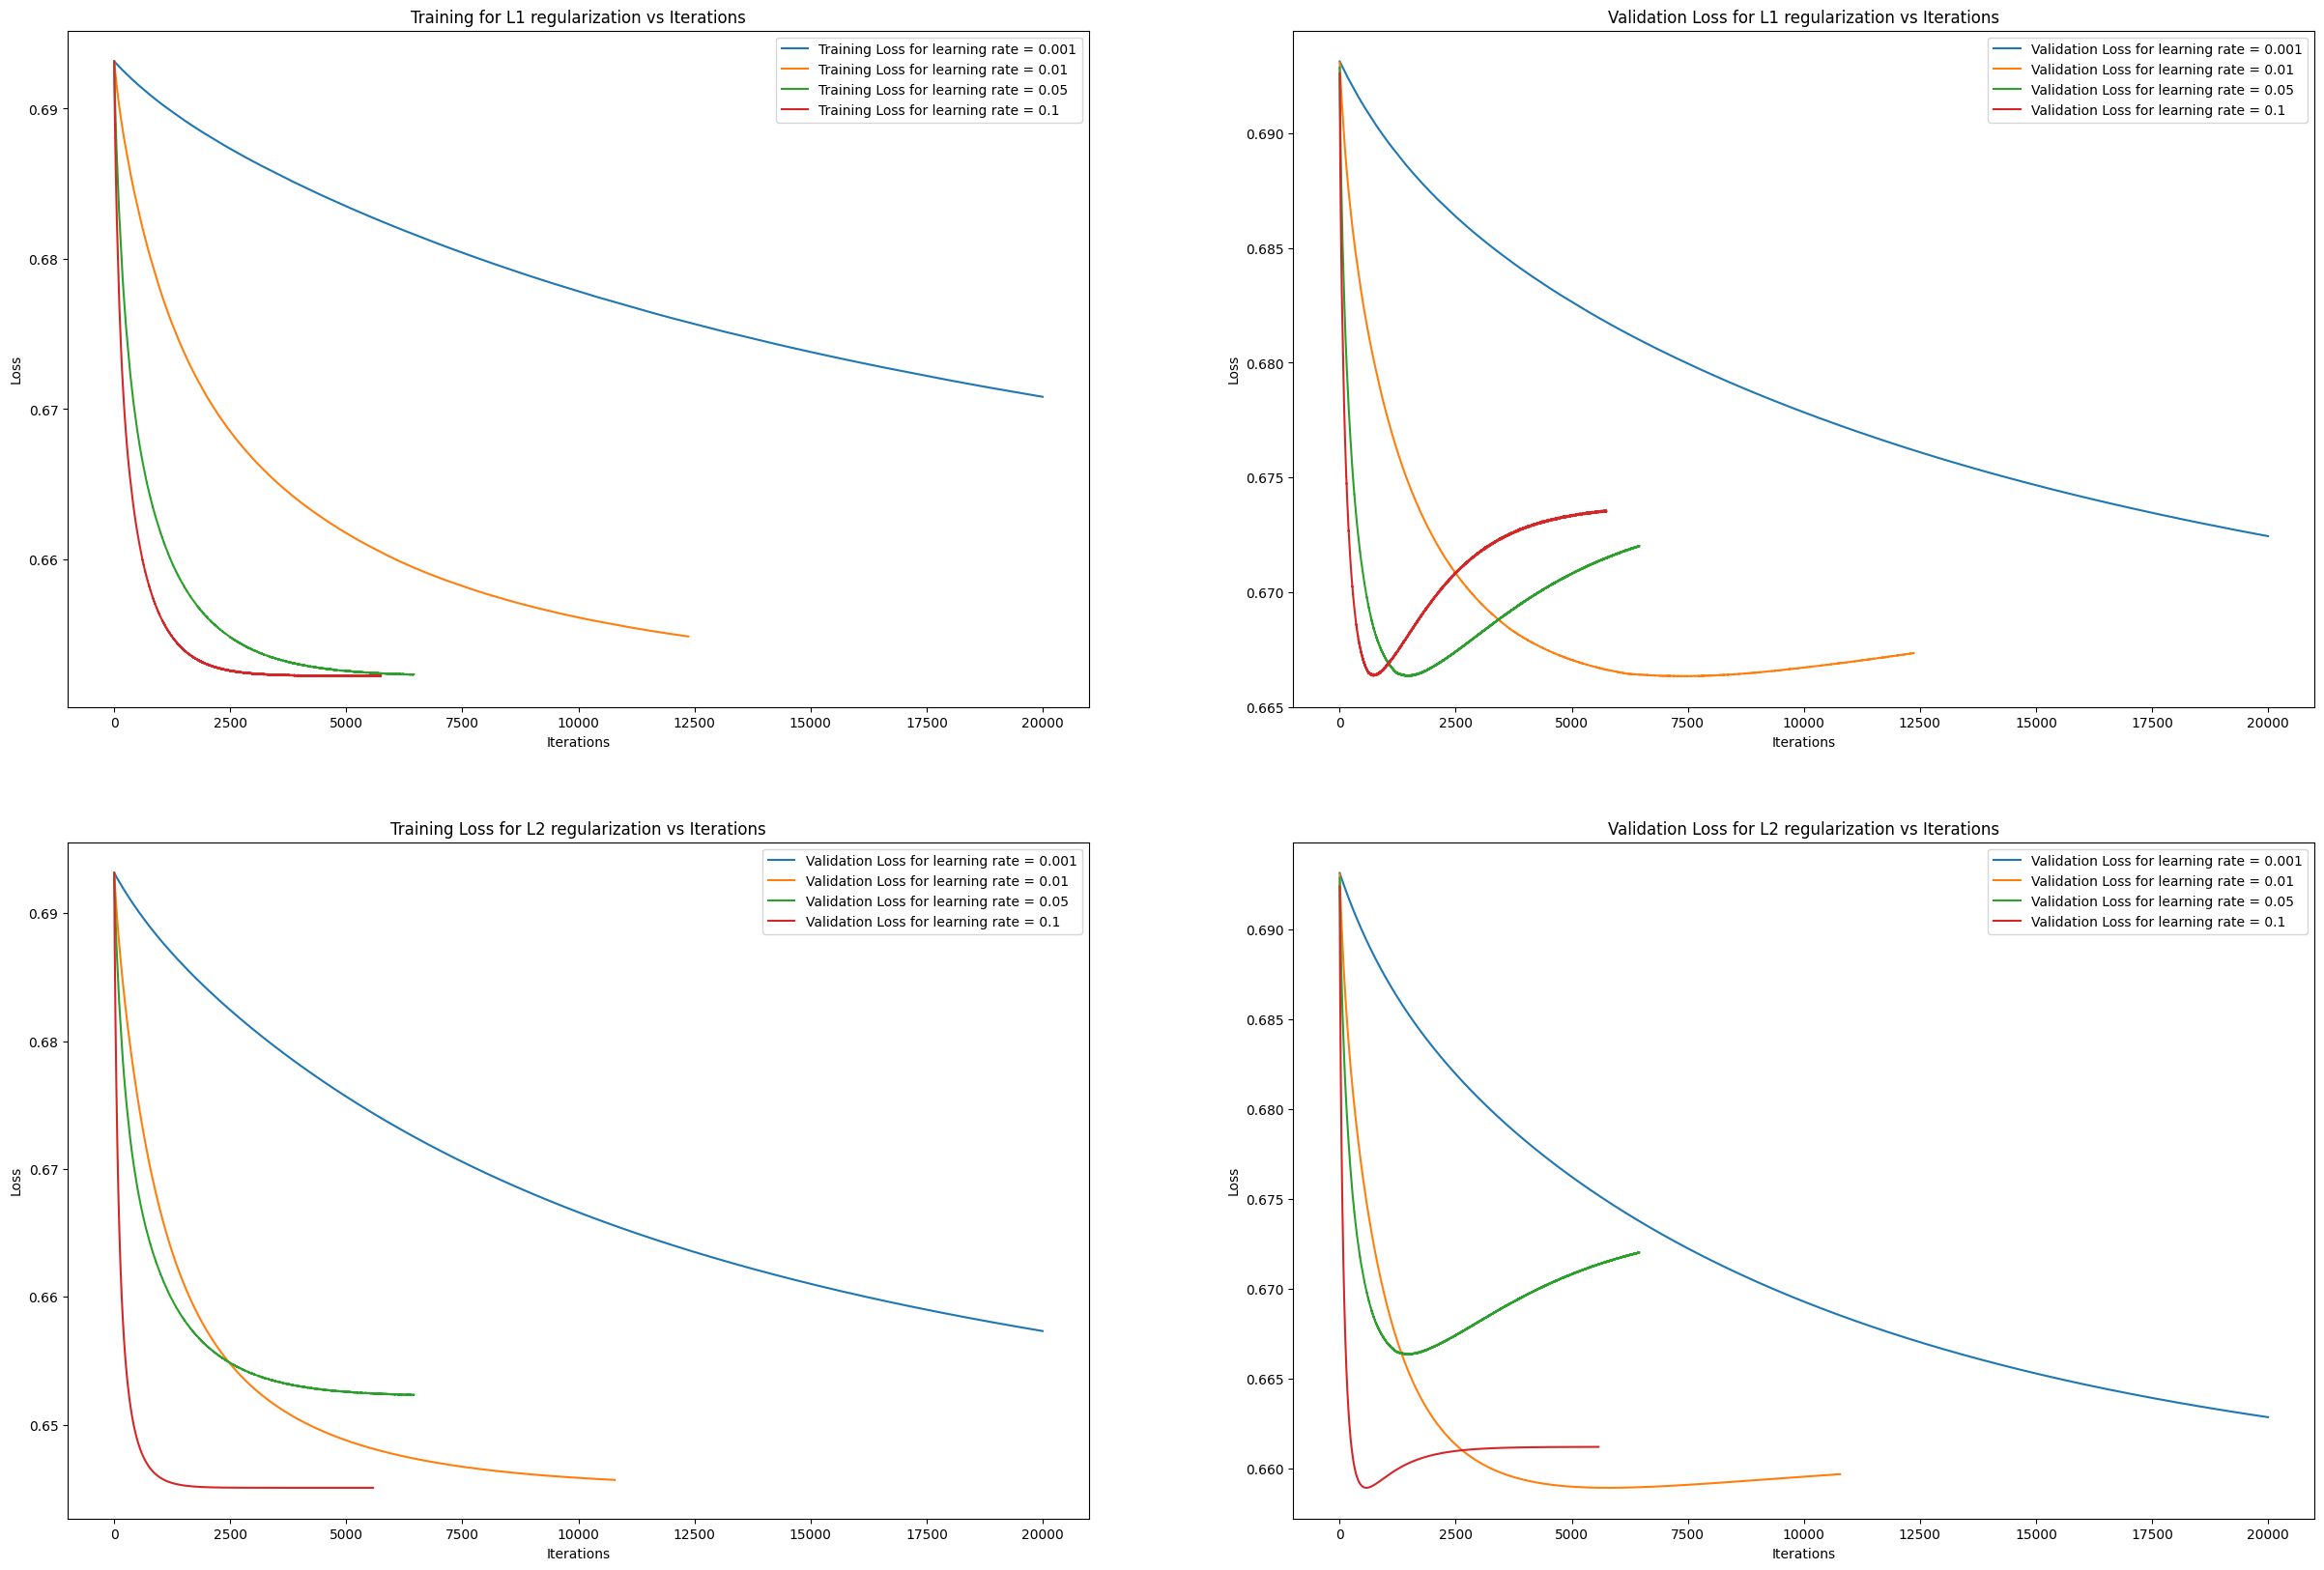

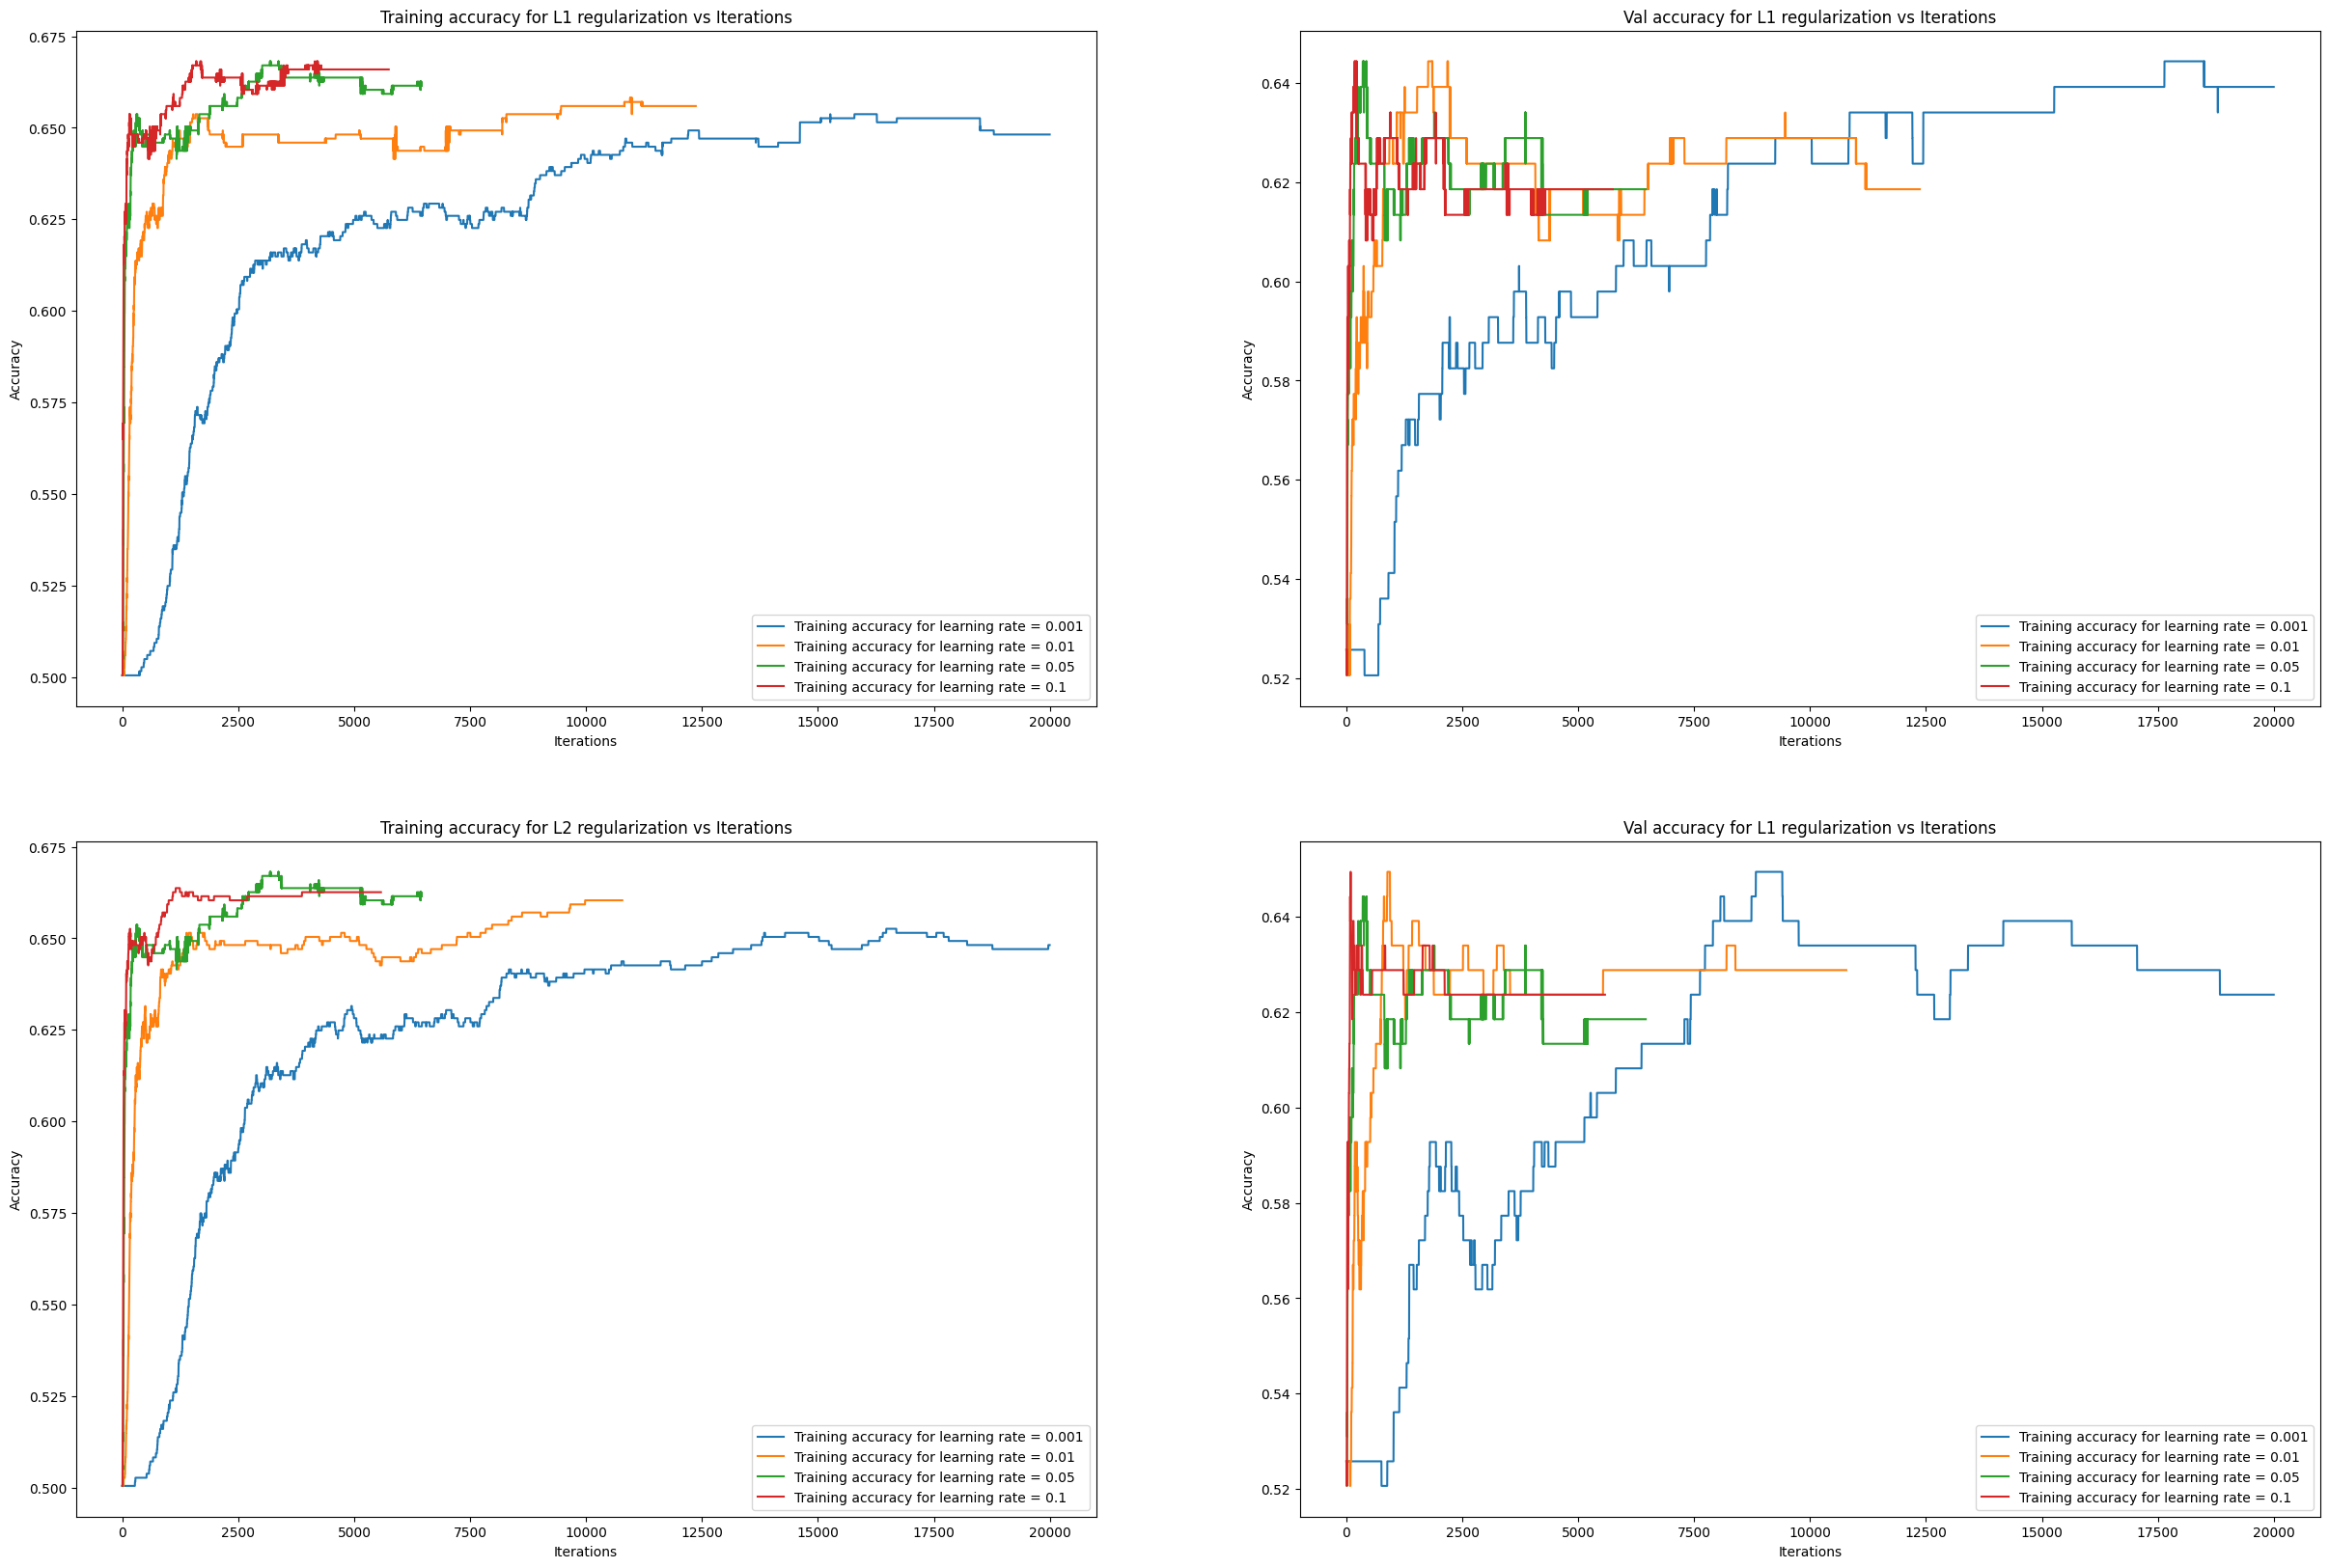

In [75]:
# plotting the graph for the training and validation loss for L1 and L2 regularization
mat.figure(figsize=(30 , 20))
mat.subplot(2,2,1)
mat.plot(costs1 , label = 'Training Loss for learning rate = 0.001')
mat.plot(costs3 , label = 'Training Loss for learning rate = 0.01')
mat.plot(costs5 , label = 'Training Loss for learning rate = 0.05')
mat.plot(costs7 , label = 'Training Loss for learning rate = 0.1')
mat.xlabel('Iterations')
mat.ylabel('Loss')
mat.title("Training for L1 regularization vs Iterations")
mat.legend()



mat.subplot(2,2,2)
mat.plot(val_costs1 , label = 'Validation Loss for learning rate = 0.001')

mat.plot(val_costs3 , label = 'Validation Loss for learning rate = 0.01')

mat.plot(val_costs5, label = 'Validation Loss for learning rate = 0.05')

mat.plot(val_costs7, label = 'Validation Loss for learning rate = 0.1')
mat.xlabel('Iterations')
mat.ylabel('Loss')
mat.title("Validation Loss for L1 regularization vs Iterations")
mat.legend()

mat.subplot(2,2,3)
mat.plot(costs2 , label = 'Validation Loss for learning rate = 0.001')

mat.plot(costs4 , label = 'Validation Loss for learning rate = 0.01')

mat.plot(costs6 , label = 'Validation Loss for learning rate = 0.05')

mat.plot(costs8 , label = 'Validation Loss for learning rate = 0.1')
mat.xlabel('Iterations')
mat.ylabel('Loss')
mat.title("Training Loss for L2 regularization vs Iterations")
mat.legend()

mat.subplot(2,2,4)
mat.plot(val_costs2 , label = 'Validation Loss for learning rate = 0.001')

mat.plot(val_costs4 , label = 'Validation Loss for learning rate = 0.01')

mat.plot(val_costs6, label = 'Validation Loss for learning rate = 0.05')

mat.plot(val_costs8, label = 'Validation Loss for learning rate = 0.1')
mat.xlabel('Iterations')
mat.ylabel('Loss')
mat.title("Validation Loss for L2 regularization vs Iterations")
mat.legend()



mat.show()
mat.figure(figsize=(30 , 20))

mat.subplot(2,2,1)
mat.plot(accuracies1, label = 'Training accuracy for learning rate = 0.001')
mat.plot(accuracies3, label = 'Training accuracy for learning rate = 0.01')
mat.plot(accuracies5, label = 'Training accuracy for learning rate = 0.05')
mat.plot(accuracies7, label = 'Training accuracy for learning rate = 0.1')
mat.xlabel('Iterations')
mat.ylabel('Accuracy')
mat.title("Training accuracy for L1 regularization vs Iterations")
mat.legend()

mat.subplot(2,2,2)
mat.plot(val_accuracies1, label = 'Training accuracy for learning rate = 0.001')
mat.plot(val_accuracies3, label = 'Training accuracy for learning rate = 0.01')
mat.plot(val_accuracies5, label = 'Training accuracy for learning rate = 0.05')
mat.plot(val_accuracies7, label = 'Training accuracy for learning rate = 0.1')
mat.xlabel('Iterations')
mat.ylabel('Accuracy')
mat.title("Val accuracy for L1 regularization vs Iterations")
mat.legend()

mat.subplot(2,2,3)
mat.plot(accuracies2, label = 'Training accuracy for learning rate = 0.001')
mat.plot(accuracies4, label = 'Training accuracy for learning rate = 0.01')
mat.plot(accuracies6, label = 'Training accuracy for learning rate = 0.05')
mat.plot(accuracies8, label = 'Training accuracy for learning rate = 0.1')
mat.xlabel('Iterations')
mat.ylabel('Accuracy')
mat.title("Training accuracy for L2 regularization vs Iterations")
mat.legend()

mat.subplot(2,2,4)
mat.plot(val_accuracies2, label = 'Training accuracy for learning rate = 0.001')
mat.plot(val_accuracies4, label = 'Training accuracy for learning rate = 0.01')
mat.plot(val_accuracies6, label = 'Training accuracy for learning rate = 0.05')
mat.plot(val_accuracies8, label = 'Training accuracy for learning rate = 0.1')
mat.xlabel('Iterations')
mat.ylabel('Accuracy')
mat.title("Val accuracy for L1 regularization vs Iterations")
mat.legend()





mat.show()